In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import allantools

DEVICE SETTINGS (see data sheet)...

Cycle count [x, y, z]: [800, 800, 800] ; Measurement rate: 0x96

Mean sampling rate: 34.32968053617903 Hz.


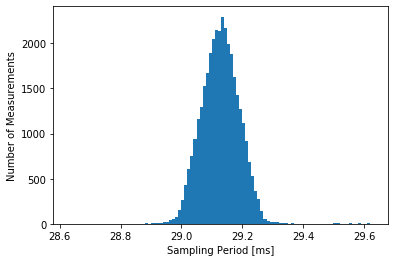

In [2]:
# Loading data file
# Column 1: B_x
# Column 2: B_y
# Column 3: B_z
# Column 4: |B|
# Column 5: time
# Column 6: Δt between measurements
magX = np.loadtxt('mag_data.txt', usecols=0, skiprows=1)
magY = np.loadtxt('mag_data.txt', usecols=1, skiprows=1)
magZ = np.loadtxt('mag_data.txt', usecols=2, skiprows=1)
magn = np.loadtxt('mag_data.txt', usecols=3, skiprows=1)
time = np.loadtxt('mag_data.txt', usecols=4, skiprows=1)
sampling_period = np.loadtxt('mag_data.txt', usecols=5, skiprows=2)

# Define the sampling period as the mean Δt between measurements
tau_0 = np.mean(sampling_period)

# Print device settings
print('DEVICE SETTINGS (see data sheet)...\n')
with open('mag_data.txt', 'r') as file:
    print(file.readline())
print('Mean sampling rate: ' + str(1/tau_0) + ' Hz.')

# Histogram of sampling periods
plt.figure(0)
plt.hist(sampling_period*10**3, 100, range=(tau_0*10**3 - .5, tau_0*10**3 + .5))
plt.xlabel('Sampling Period [ms]')
plt.ylabel('Number of Measurements')
plt.show()

# Compute overlapping Allan variance for B_x, B_y, B_z, and |B|
(tauX, adevX, adev_errorX, nX) = allantools.oadev(magX, rate=1/tau_0, taus='all')
(tauY, adevY, adev_errorY, nY) = allantools.oadev(magY, rate=1/tau_0, taus='all')
(tauZ, adevZ, adev_errorZ, nZ) = allantools.oadev(magZ, rate=1/tau_0, taus='all')
(tau, adev, adev_error, n) = allantools.oadev(magn, rate=1/tau_0, taus='all')

# Compute standard deviation and mean of the measurements
stdX = np.std(magX)
stdY = np.std(magY)
stdZ = np.std(magZ)
std = np.std(magn)
meanX = np.mean(magX)
meanY = np.mean(magY)
meanZ = np.mean(magZ)
mean = np.mean(magn)

# Compute spectral density
(fX, psdX) = sp.signal.periodogram(magX, fs=1/tau_0)
(fY, psdY) = sp.signal.periodogram(magY, fs=1/tau_0)
(fZ, psdZ) = sp.signal.periodogram(magZ, fs=1/tau_0)
(f, psd) = sp.signal.periodogram(magn, fs=1/tau_0)

# B_x

Mean of measurements: 39694.87514418876 nT.
Standard deviation of measurements: 69.42150668113388 nT.


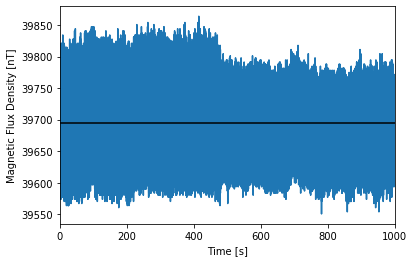

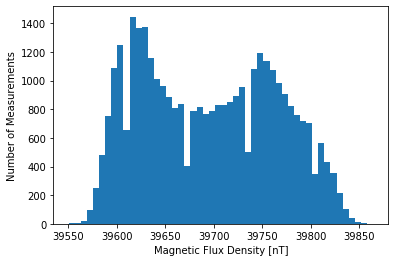

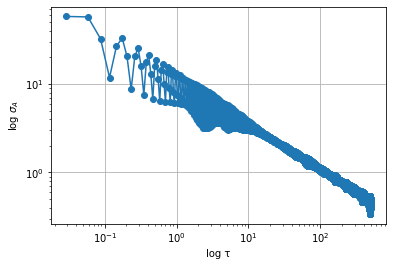

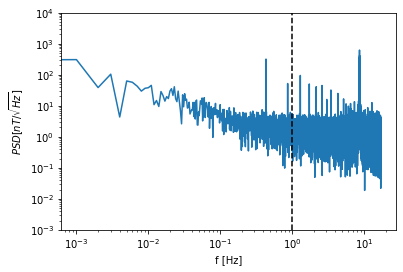

Noise floor at 1 Hz: 2.276197152376473 nT * Hz^(-1/2).


In [3]:
print('Mean of measurements: ' + str(meanX) + ' nT.')
print('Standard deviation of measurements: ' + str(stdX) + ' nT.')

# B_x vs time
plt.figure(1)
plt.plot(time, magX, zorder=1)
plt.hlines(meanX, 0, 1000, zorder=2)
plt.xlim(0, 1000)
plt.xlabel('Time [s]')
plt.ylabel('Magnetic Flux Density [nT]')
plt.show()

# histogram
plt.figure(2)
plt.hist(magX, 50)
plt.xlabel('Magnetic Flux Density [nT]')
plt.ylabel('Number of Measurements')
plt.show()

# log-log plot of Allan deviation vs averaging time
plt.figure(3)
plt.loglog(tauX, np.sqrt(adevX), '-o')
plt.grid()
plt.xlabel('log τ')
plt.ylabel(r'log $ \sigma_A $')
plt.show()

# log-log plot of power spectral desity vs frequency
plt.figure(4)
plt.loglog(fX, np.sqrt(psdX), zorder=1)
plt.vlines(1, 10**-3, 10**4, linestyles='dashed', zorder=2)
plt.ylim(10**-3,10**4)
plt.xlabel('f [Hz]')
plt.ylabel(r'$PSD [nT/\sqrt{Hz}]$')
plt.show()

print('Noise floor at 1 Hz: ' + str(np.sqrt(psdX[np.searchsorted(fX, 1., side="left")])) + ' nT * Hz^(-1/2).')

# B_y

Mean of measurements: 23124.332525487913 nT.
Standard deviation of measurements: 76.63406782466706 nT.


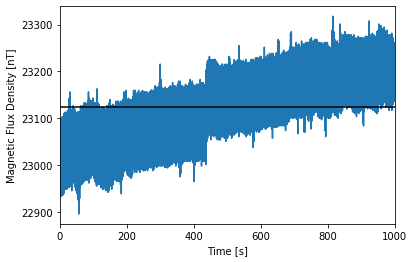

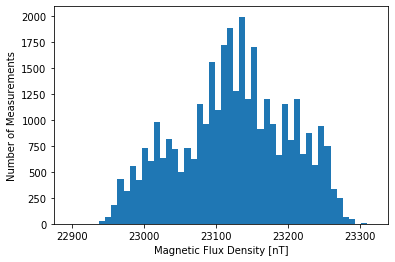

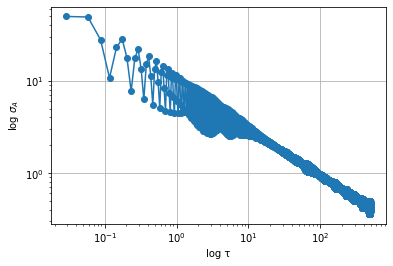

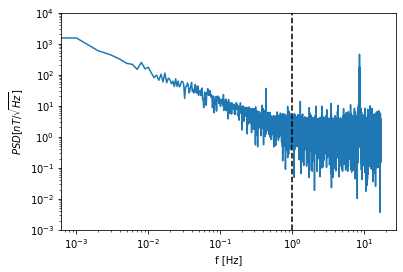

Noise floor at 1 Hz: 1.0294071207232633 nT * Hz^(-1/2).


In [4]:
print('Mean of measurements: ' + str(meanY) + ' nT.')
print('Standard deviation of measurements: ' + str(stdY) + ' nT.')

# B_y vs time
plt.figure(5)
plt.plot(time, magY, zorder=1)
plt.hlines(meanY, 0, 1000, zorder=2)
plt.xlim(0, 1000)
plt.xlabel('Time [s]')
plt.ylabel('Magnetic Flux Density [nT]')
plt.show()

# histogram
plt.figure(6)
plt.hist(magY, 50)
plt.xlabel('Magnetic Flux Density [nT]')
plt.ylabel('Number of Measurements')
plt.show()

# log-log plot of Allan deviation vs averaging time
plt.figure(7)
plt.loglog(tauY, np.sqrt(adevY), '-o')
plt.grid()
plt.xlabel('log τ')
plt.ylabel(r'log $ \sigma_A $')
plt.show()

# log-log plot of power spectral desity vs frequency
plt.figure(8)
plt.loglog(fY, np.sqrt(psdY), zorder=1)
plt.vlines(1, 10**-3, 10**4, linestyles='dashed', zorder=2)
plt.ylim(10**-3,10**4)
plt.xlabel('f [Hz]')
plt.ylabel(r'$PSD [nT/\sqrt{Hz}]$')
plt.show()

print('Noise floor at 1 Hz: ' + str(np.sqrt(psdY[np.searchsorted(fY, 1., side="left")])) + ' nT * Hz^(-1/2).')

# B_z

Mean of measurements: -9305.695857850276 nT.
Standard deviation of measurements: 51.650899170437114 nT.


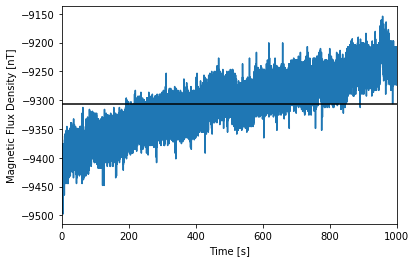

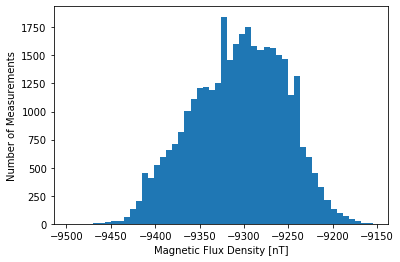

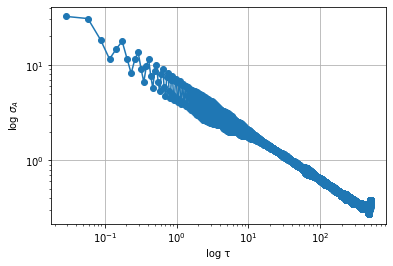

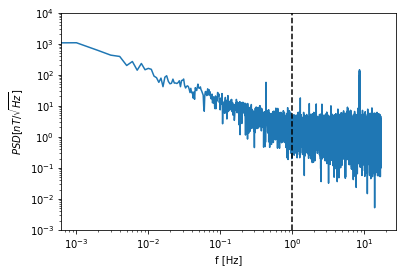

Noise floor at 1 Hz: 1.7856594995622765 nT * Hz^(-1/2).


In [5]:
print('Mean of measurements: ' + str(meanZ) + ' nT.')
print('Standard deviation of measurements: ' + str(stdZ) + ' nT.')

# B_z vs time
plt.figure(9)
plt.plot(time, magZ, zorder=1)
plt.hlines(meanZ, 0, 1000, zorder=2)
plt.xlim(0, 1000)
plt.xlabel('Time [s]')
plt.ylabel('Magnetic Flux Density [nT]')
plt.show()

# histogram
plt.figure(10)
plt.hist(magZ, 50)
plt.xlabel('Magnetic Flux Density [nT]')
plt.ylabel('Number of Measurements')
plt.show()

# log-log plot of Allan deviation vs averaging time
plt.figure(11)
plt.loglog(tauZ, np.sqrt(adevZ), '-o')
plt.grid()
plt.xlabel('log τ')
plt.ylabel(r'log $ \sigma_A $')
plt.show()

# log-log plot of power spectral desity vs frequency
plt.figure(12)
plt.loglog(fZ, np.sqrt(psdZ), zorder=1)
plt.vlines(1, 10**-3, 10**4, linestyles='dashed', zorder=2)
plt.ylim(10**-3,10**4)
plt.xlabel('f [Hz]')
plt.ylabel(r'$PSD [nT/\sqrt{Hz}]$')
plt.show()

print('Noise floor at 1 Hz: ' + str(np.sqrt(psdZ[np.searchsorted(fZ, 1., side="left")])) + ' nT * Hz^(-1/2).')

# |B|

Mean of measurements: 46872.442246900995 nT.
Standard deviation of measurements: 36.8864899631919 nT.


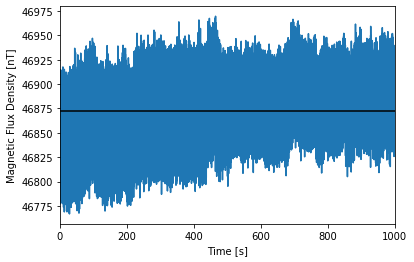

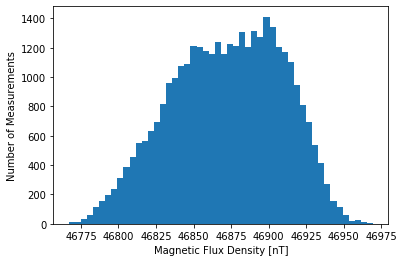

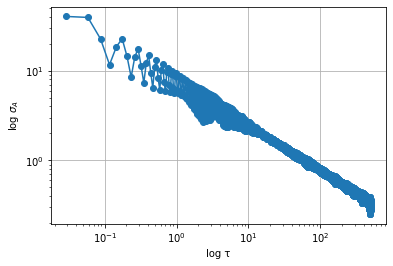

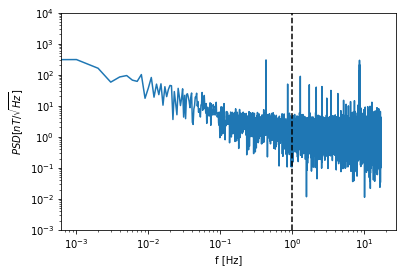

Noise floor at 1 Hz: 1.6395076385847727 nT * Hz^(-1/2).


In [6]:
print('Mean of measurements: ' + str(mean) + ' nT.')
print('Standard deviation of measurements: ' + str(std) + ' nT.')

# |B| vs time
plt.figure(13)
plt.plot(time, magn, zorder=1)
plt.hlines(mean, 0, 1000, zorder=2)
plt.xlim(0, 1000)
plt.xlabel('Time [s]')
plt.ylabel('Magnetic Flux Density [nT]')
plt.show()

# histogram
plt.figure(14)
plt.hist(magn, 50)
plt.xlabel('Magnetic Flux Density [nT]')
plt.ylabel('Number of Measurements')
plt.show()

# log-log plot of Allan deviation vs averaging time
plt.figure(15)
plt.loglog(tau, np.sqrt(adev), '-o')
plt.grid()
plt.xlabel('log τ')
plt.ylabel(r'log $ \sigma_A $')
plt.show()

# log-log plot of power spectral desity vs frequency
plt.figure(16)
plt.loglog(f, np.sqrt(psd), zorder=1)
plt.vlines(1, 10**-3, 10**4, linestyles='dashed', zorder=2)
plt.ylim(10**-3,10**4)
plt.xlabel('f [Hz]')
plt.ylabel(r'$PSD [nT/\sqrt{Hz}]$')
plt.show()

print('Noise floor at 1 Hz: ' + str(np.sqrt(psd[np.searchsorted(f, 1., side="left")])) + ' nT * Hz^(-1/2).')

# |B| for shorter data set (first 10s of data)

[-4.47080396e+01  1.13379947e+00  4.68445190e+04]


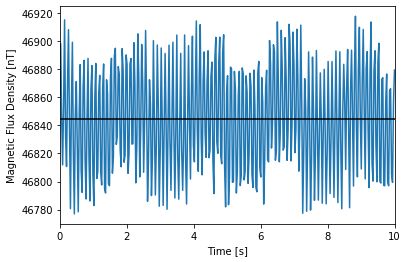

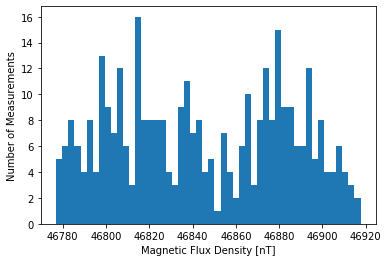

In [7]:
idx_10s = np.searchsorted(time, 10., side="left")

# |B| vs time
plt.figure(15)
plt.plot(time[0:idx_10s], magn[0:idx_10s], zorder=1)
plt.hlines(np.mean(magn[0:idx_10s]), 0, 10, zorder=2)
plt.xlim(0, 10)
plt.xlabel('Time [s]')
plt.ylabel('Magnetic Flux Density [nT]')
plt.show()

# histogram
plt.figure(16)
plt.hist(magn[0:idx_10s], 50)
plt.xlabel('Magnetic Flux Density [nT]')
plt.ylabel('Number of Measurements')
plt.show()

# Analysis of a different data set. Trying to isolate 60 Hz noise.

DEVICE SETTINGS (see data sheet)...

Cycle count [x, y, z]: [1000, 1000, 1000] ; Measurement rate: 0x95

Mean sampling rate: 31.516882037333087 Hz.


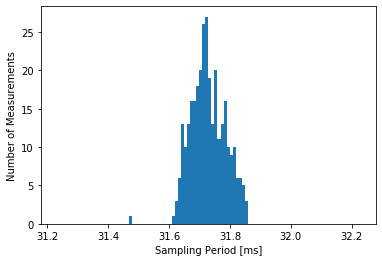

In [8]:
# Loading data file
# Column 1: B_x
# Column 2: B_y
# Column 3: B_z
# Column 4: |B|
# Column 5: time
# Column 6: Δt between measurements
magX_short = np.loadtxt('mag_data_short.txt', usecols=0, skiprows=1)
magY_short = np.loadtxt('mag_data_short.txt', usecols=1, skiprows=1)
magZ_short = np.loadtxt('mag_data_short.txt', usecols=2, skiprows=1)
magn_short = np.loadtxt('mag_data_short.txt', usecols=3, skiprows=1)
time_short = np.loadtxt('mag_data_short.txt', usecols=4, skiprows=1)
sampling_period_short = np.loadtxt('mag_data_short.txt', usecols=5, skiprows=2)

# Define the sampling period as the mean Δt between measurements
tau_0_short = np.mean(sampling_period_short)

# Print device settings
print('DEVICE SETTINGS (see data sheet)...\n')
with open('mag_data_short.txt', 'r') as file:
    print(file.readline())
print('Mean sampling rate: ' + str(1/tau_0_short) + ' Hz.')

# Histogram of sampling periods
plt.figure(17)
plt.hist(sampling_period_short*10**3, 100, range=(tau_0_short*10**3 - .5, tau_0_short*10**3 + .5))
plt.xlabel('Sampling Period [ms]')
plt.ylabel('Number of Measurements')
plt.show()

# Compute standard deviation and mean of the measurements
stdX_short = np.std(magX_short)
stdY_short = np.std(magY_short)
stdZ_short = np.std(magZ_short)
std_short = np.std(magn_short)
meanX_short = np.mean(magX_short)
meanY_short = np.mean(magY_short)
meanZ_short = np.mean(magZ_short)
mean_short = np.mean(magn_short)

# Compute spectral density
(fX_short, psdX_short) = sp.signal.periodogram(magX_short, fs=1/tau_0_short)
(fY_short, psdY_short) = sp.signal.periodogram(magY_short, fs=1/tau_0_short)
(fZ_short, psdZ_short) = sp.signal.periodogram(magZ_short, fs=1/tau_0_short)
(f_short, psd_short) = sp.signal.periodogram(magn_short, fs=1/tau_0_short)

Mean of measurements: 28379.571869872725 nT.
Standard deviation of measurements: 20.406662429283795 nT.


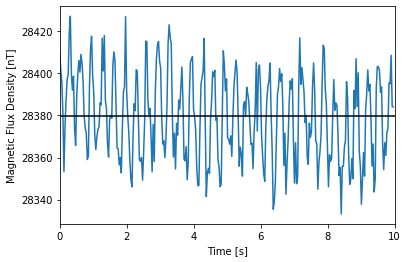

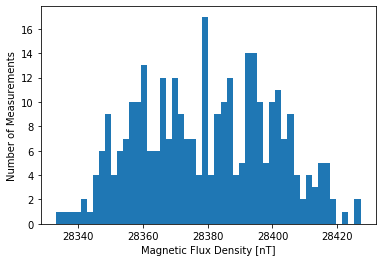

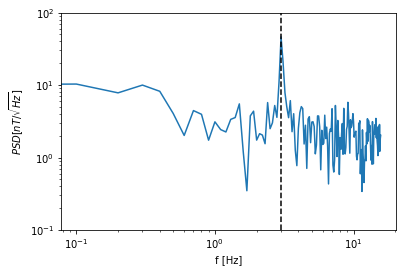

Maximum power density occurs at 3.0016078130793415 Hz.
For 60 Hz noise, we should expect alias frequency at 3.0337640746661734 Hz.


In [18]:
print('Mean of measurements: ' + str(mean_short) + ' nT.')
print('Standard deviation of measurements: ' + str(std_short) + ' nT.')

# |B| vs time
plt.figure(18)
plt.plot(time_short, magn_short, zorder=1)
plt.hlines(mean_short, 0, 10, zorder=2)
plt.xlim(0, 10)
plt.xlabel('Time [s]')
plt.ylabel('Magnetic Flux Density [nT]')
plt.show()

# histogram
plt.figure(19)
plt.hist(magn_short, 50)
plt.xlabel('Magnetic Flux Density [nT]')
plt.ylabel('Number of Measurements')
plt.show()

# log-log plot of power spectral desity vs frequency
plt.figure(20)
plt.loglog(f_short, np.sqrt(psd_short), zorder=1)
max_idx = np.argmax(psd_short)
plt.vlines(f_short[max_idx], 10**-1, 10**2, linestyles='dashed', zorder=2)
plt.ylim(10**-1,10**2)
plt.xlabel('f [Hz]')
plt.ylabel(r'$PSD [nT/\sqrt{Hz}]$')
plt.show()

print('Maximum power density occurs at ' + str(f_short[max_idx]) + ' Hz.')
print('For 60 Hz noise, we should expect alias frequency at ' + str(abs(60 - 2/tau_0_short)) + ' Hz.')

Calculated parameters for fitted 60Hz sine wave (see fit_func):

[2.39145641e+01 1.05287154e+00 2.83794401e+04]


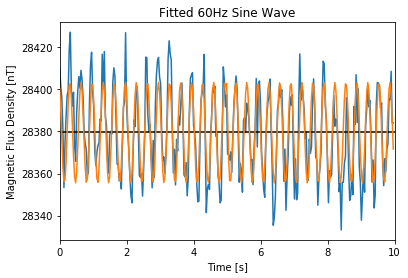

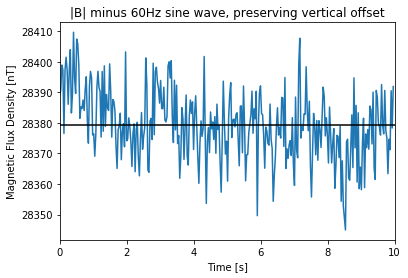

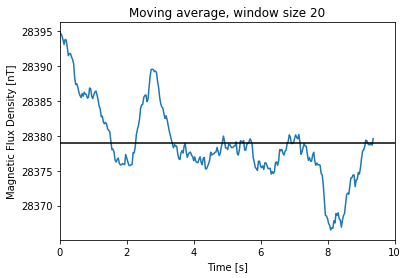

In [40]:
# Define general 60 Hz sine wave for fitting
def fit_func(t, a, b, c):
    return a * np.sin(120*np.pi*(t + b)) + c

# Fit a 60 Hz sine wave to the data
params, params_covariance = sp.optimize.curve_fit(fit_func, time_short, magn_short)
print('Calculated parameters for fitted 60Hz sine wave (see fit_func):\n')
print(params)

# |B| vs time, with a fitted 60 Hz sine wave
plt.figure(21)
plt.plot(time_short, magn_short, zorder=1)
plt.hlines(mean_short, 0, 10, zorder=2)
plt.plot(time_short, fit_func(time_short, params[0], params[1], params[2]), zorder=3)
plt.xlim(0, 10)
plt.title('Fitted 60Hz Sine Wave')
plt.xlabel('Time [s]')
plt.ylabel('Magnetic Flux Density [nT]')
plt.show()

# Subtract the sine wave from |B|, preserving the vertical offset
adjusted_magn = magn_short - fit_func(time_short, params[0], params[1], params[2]) + params[2]
adjusted_mean = np.mean(adjusted_magn)

# |B| vs time, minus the 60 Hz sine wave
plt.figure(22)
plt.plot(time_short, adjusted_magn, zorder=1)
plt.hlines(adjusted_mean, 0, 10, zorder=2)
plt.xlim(0, 10)
plt.title('|B| minus 60Hz sine wave, preserving vertical offset')
plt.xlabel('Time [s]')
plt.ylabel('Magnetic Flux Density [nT]')
plt.show()

# Define moving average function
def moving_average(data_set, periods):
    weights = np.ones(periods) / periods
    return np.convolve(data_set, weights, mode='valid')

# Take moving average of adjusted data
p = 20
adjusted_magn_ma = moving_average(adjusted_magn, p)
adjusted_mean_ma = np.mean(adjusted_magn_ma)

# |B| vs time, minus the 60 Hz sine wave, averaged
plt.figure(23)
plt.plot(time_short[0:-(p-1)], adjusted_magn_ma, zorder=1)
plt.hlines(adjusted_mean_ma, 0, 10, zorder=2)
plt.xlim(0, 10)
plt.title('Moving average, window size ' + str(p))
plt.xlabel('Time [s]')
plt.ylabel('Magnetic Flux Density [nT]')
plt.show()